# Investigating Fandango Movie Ratings

In his 2015 article [Be Suspicious of Online Movie Ratings, Especially Fandango's](https://fivethirtyeight.com/features/fandango-movies-ratings/), Walt Hickey argued using [data he collected](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) that Fandango had inflated its user's movie rankings. In this analysis, we will investigate whether Fandango's ratings still appear to be inflated, by comparing to this [dataset](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) collected by user mircealex consisting of a sample of movies ranked after Hickey's article was published. We'll call these respectively the "Before" and "After" sets.

Specifically, the "Before" set consists of all films from Jan-Aug 2015 that had ratings on all websites and at least 30 fan reviews on Fandango. The "After" set contains a selection of the "most popular movies" (no specific threshold given) released in 2016 and Jan-Mar 2017.

Hence, these are fairly representative of movies in 2015 and 2016/beginning of 2017, respectively. However, they come from different years, so the populations from which they're sampled may have different characteristics.

In [1]:
import pandas as pd

scores_before = pd.read_csv('fandango_score_comparison.csv')
scores_after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
scores_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
scores_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
print('Before sample size:' , scores_before.shape[0])
print('After sample size:' , scores_after.shape[0])

Before sample size: 146
After sample size: 214


## Refining the Sample

Below we see that the "before" scores come from 2014 and 2015, and that the "after" scores include 2016 and 2017. We'll filter "before" to just 2015 and "after" to just 2016. Limiting the samples to just these years is somewhat arbitrary, but makes it easier to speak about the populations these samples come from.

In [5]:
scores_before['FILM'].str.extract('\(([0-9]+)\)').value_counts()

2015    129
2014     17
dtype: int64

In [6]:
scores_before = scores_before[scores_before['FILM'].str.contains('\(2015\)')].copy()

In [7]:
scores_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [8]:
scores_after = scores_after[scores_after['year'] == 2016].copy()

In addition, the "before" sample only contains movies with 30 or more fan rankings:

In [9]:
print('Minimum number of votes:' , scores_before['Fandango_votes'].min())

Minimum number of votes: 35


The second set does not have as specific a criterion for determining popularity. Additionally, Fandango's site no longer lists the number of user votes. So, we'll take a random sample of films and check their number of votes on IMDB as a proxy. We'll compare to the number of votes that the least popular 2015 movies have on IMDB.

In [10]:
scores_after['movie'].sample(10, random_state = 57)

111                       Miracles from Heaven
161                    The Autopsy of Jane Doe
206                                   Warcraft
141                              Sausage Party
170                               The Darkness
76                                    Imperium
51     Fantastic Beasts and Where to Find Them
46                                        Elle
181                            The Infiltrator
133                             Precious Cargo
Name: movie, dtype: object

In [11]:
scores_before[scores_before['Fandango_votes'] < 40]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
39,Maps to the Stars (2015),60,46,67,5.8,6.3,3.5,3.1,3.00,2.30,...,3.15,3.0,2.5,3.5,3.0,3.0,46,22440,35,0.4
43,The Diary of a Teenage Girl (2015),95,81,87,6.3,7.0,4.0,3.6,4.75,4.05,...,3.50,5.0,4.0,4.5,3.0,3.5,18,1107,38,0.4
71,The Wrecking Crew (2015),93,84,67,7.0,7.8,4.5,4.2,4.65,4.20,...,3.90,4.5,4.0,3.5,3.5,4.0,4,732,38,0.3
122,Tangerine (2015),95,86,86,7.3,7.4,4.0,3.9,4.75,4.30,...,3.70,5.0,4.5,4.5,3.5,3.5,14,696,36,0.1


"The Wrecking Crew" is the least with approximately 2700 votes. All movies from the sample have at least this many votes; the lowest is "Precious Cargo" with 8600 votes. Hence the two samples seem to have similar popularity thresholds.

## Comparing "Before" and "After" Fandango Ratings

To begin investigating whether Fandango has stopped inflating its ratings, we can first compare the distribution of the Fandango website's star ratings in the "Before" and "After" sets.

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

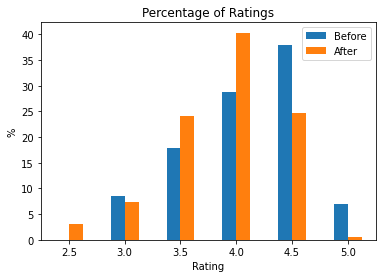

In [13]:
counts_before = scores_before['Fandango_Stars'].value_counts(normalize = True) * 100
counts_after = scores_after['fandango'].value_counts(normalize = True) * 100

both_counts = pd.merge(
    counts_before, counts_after, left_index = True, right_index = True, how = 'outer').sort_index().rename(
    columns = {'Fandango_Stars': 'Before', 'fandango': 'After'})

both_counts.plot.bar(rot = 0)
plt.title('Percentage of Ratings')
plt.xlabel('Rating')
plt.ylabel('%')
plt.show()

It does indeed seem that the percentage of 5-star and 4.5-star ratings has decreased. Does this mean they are now reflecting accurate ratings?

This depends firstly on how "skewed" ratings were before. We only have data on fan vs website ratings for the "before" data. From this we can estimate how skewed the ratings were. First we'll graph both sets of ratings and visually verify the difference:

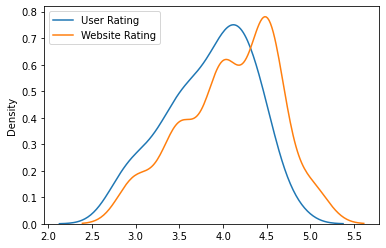

In [14]:
sns.kdeplot(x = 'Fandango_Ratingvalue', data = scores_before)
sns.kdeplot(x = 'Fandango_Stars', data = scores_before)
plt.legend(['User Rating', 'Website Rating'])
plt.xlabel('')
plt.show()

Below, we calculate that the mean inflation was about 0.24 stars, and we can see from the box plot that this inflation was fairly uniform, with 50% of inflation between 0.1 and 0.4 stars. (We could, though, look for patterns in the most inflated movies to refine this).

In [15]:
print('Average score inflation:', round(scores_before['Fandango_Difference'].mean(),2))

Average score inflation: 0.24


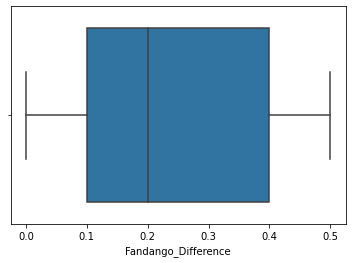

In [16]:
sns.boxplot(x = 'Fandango_Difference', data = scores_before)
plt.show()

Hence, if we adjust the old rankings down by 0.24, we will get a very rough estimate of the "true" distribution. We make two comparisons below:
- Adjusted "Before" website rankings vs "After" website rankings
- "Before" user rankings vs "After" website rankings

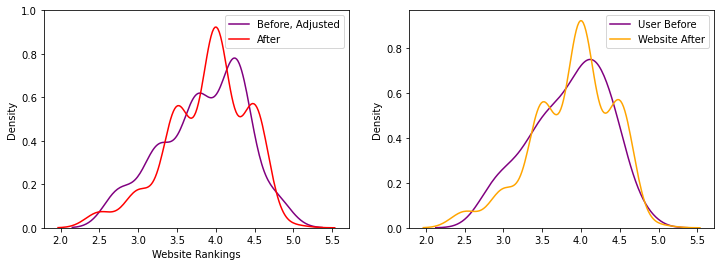

In [17]:
fig = plt.figure(figsize = (12,4))
ax1 = plt.subplot(1,2,1)
scores_before['fandango_adjusted'] = scores_before['Fandango_Stars'] - 0.24
sns.kdeplot(x = 'fandango_adjusted', data = scores_before, color = 'purple')
sns.kdeplot(x = 'fandango', data = scores_after, color = 'red')

plt.ylim((0,1))
plt.xlabel('Website Rankings')
plt.legend(['Before, Adjusted', 'After'], loc = 'best')

ax2 = plt.subplot(1,2,2)
sns.kdeplot(x = 'Fandango_Ratingvalue', data = scores_before, color = 'purple')
sns.kdeplot(x = 'fandango', data = scores_after, color = 'orange')
plt.legend(['User Before', 'Website After'])
plt.xlabel('')
plt.show()


We can see that the "After" rankings pretty closely align to the "deflated" rankings. Of course, it's a different set of movies, so we wouldn't expect to have exactly the same ranking distribution. Movies could simply have ranked lower in 2016. To compare, we represent the distribution of each set with a box plot below and also calculate their mean:

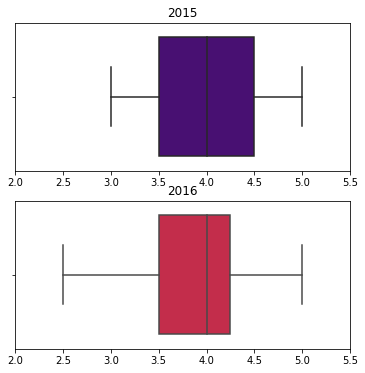

Mean 2015 Score: 4.09
Mean 2016 Score: 3.89


In [18]:
fig = plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
sns.boxplot(x = 'Fandango_Stars', data = scores_before, color = 'indigo')
plt.title('2015')
plt.xlabel('')
plt.xlim((2,5.5))

plt.subplot(2,1,2)
sns.boxplot(x = 'fandango', data = scores_after, color = 'crimson', whis = 4)
plt.title('2016')
plt.xlabel('')
plt.xlim((2,5.5))

plt.show()

print('Mean 2015 Score:', round(scores_before['Fandango_Stars'].mean(),2))
print('Mean 2016 Score:', round(scores_after['fandango'].mean(),2))

The first quartile and median are the same. However, the minimum and third quartile in 2016 are lower, suggesting that there were fewer movies above 4.5 stars and more below 3 stars in 2016.

We can also see that the mean 2016 score is 0.2 lower than 2015. Hence, we can conclude that scores were generally lower in 2016, but cannot yet attribute this to Fandango's practices vs quality of movie.

To further investigate the differences in the rankings of 2015 and 2016, we'll compare to a second source of rankings.

## Comparing to Metacritic
We can use data from the review aggregation website Metacritic to estimate whether the "Before" and "After" samples have comparable distributions, or if the lower rankings in 2016 reflect lower quality films. Since Metacritic aggregates data from many reviews and websites, it likely reflects a more accurate ranking of the films' quality.

First let's visually compare the Metacritic and Fandango ratings, before and after. In doing this, we can check the previous finding that the Fandango ratings do appear higher than that on other sites. We'll rescale Metacritic ratings to be out of 5 instead of 100 in the before set. (This has already been done in the after set.)

In [19]:
scores_before['Metacritic_rescaled'] = scores_before['Metacritic'] / 20

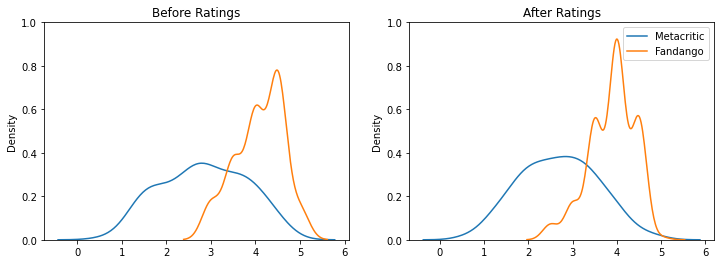

In [20]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x = 'Metacritic_rescaled', data = scores_before)
sns.kdeplot(x = 'Fandango_Stars', data = scores_before)
ax.set_title('Before Ratings')
plt.ylim((0,1))
plt.xlabel('')

ax = fig.add_subplot(1,2,2)
sns.kdeplot(x = 'n_metascore', data = scores_after, legend = True)
sns.kdeplot(x = 'fandango', data = scores_after)
ax.set_title('After Ratings')
plt.ylim((0,1))
plt.xlabel('')

plt.legend(['Metacritic', 'Fandango'], loc = 'best')
plt.show()

We can see that both before and after, the Fandango ratings are skewed to the left compared to the roughly normally distributed Metacritic ratings. This supports the claim that the Fandango ratings tend to be higher in general than the Metacritic rating. The "after" ratings trend slightly lower for both Fandango and Metacritic. We saw this in the Fandango results above. But since it's also the case for Metacritic, perhaps the second set of movies reflects a population with a lower average.

Here's a direct comparison of before and after for each distribution:

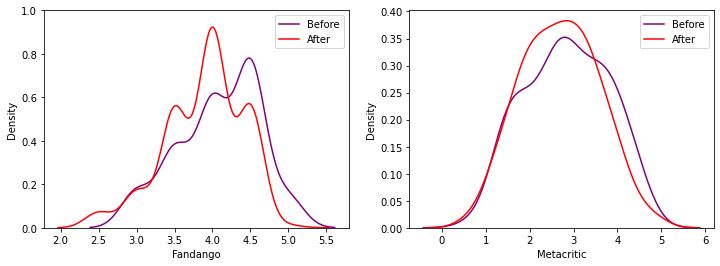

In [21]:
fig = plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.kdeplot(x = 'Fandango_Stars', data = scores_before, color = 'purple')
sns.kdeplot(x = 'fandango', data = scores_after, color = 'red')

plt.ylim((0,1))
plt.xlabel('Fandango')
plt.legend(['Before', 'After'], loc = 'best')

plt.subplot(1,2,2)
sns.kdeplot(x = 'Metacritic_rescaled', data = scores_before, color = 'purple')
sns.kdeplot(x = 'n_metascore', data = scores_after, color = 'red')
plt.xlabel('Metacritic')
plt.legend(['Before', 'After'], loc = 'best')

plt.show()

In [22]:
before_mean = scores_before['Fandango_Stars'].mean()
after_mean = scores_after['fandango'].mean()

print('Fandango mean before:', round(before_mean,2), 'Fandango mean after', round(after_mean,2))
print('Metacritic mean before:', round(scores_before['Metacritic_rescaled'].mean(),2),
      'Metacritic mean after:', round(scores_after['n_metascore'].mean(),1))

Fandango mean before: 4.09 Fandango mean after 3.89
Metacritic mean before: 2.84 Metacritic mean after: 2.7


Now it's apparent that the metacritic ratings are lower from both the graphs and means. Both "after" distributions are shifted left toward lower scores. Both means are lower, though Fandango's drops by 0.21 compared to Metacritic's 0.14. So it's possible Fandango did deflate some, but part of the lowered scores also appears to be due to lower ranking of the 2016 films overall.

Could we compare the *difference* between Fandango rating and (scaled) Metacritic rating to determine whether the Fandango distribution has actually changed?

Since we're only working with Fandango & Metacritic, we'll reduce the dataframes to only those relevant to the movie title, year, and fandango & Metacritic rating(s).

In [23]:
before = scores_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                               'Fandango_votes', 'Fandango_Difference', 'Metacritic_rescaled']].copy()

after = scores_after[['movie', 'year', 'fandango', 'n_metascore']].copy()

Let's add a column that measures the difference between the two scores, and then compare these two distributions:

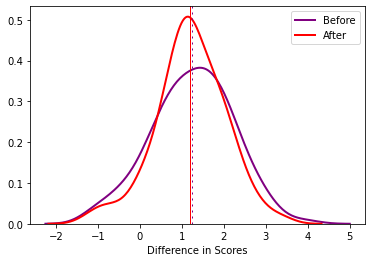

In [24]:
before['difference'] = before['Fandango_Stars'] - before['Metacritic_rescaled']
after['difference'] = after['fandango'] - after['n_metascore']

sns.kdeplot(x = 'difference', data = before, color = 'purple', lw = 2)
sns.kdeplot(x = 'difference', data = after, color = 'red', lw = 2 )
plt.axvline(before['difference'].mean(), color = 'purple', lw = 1, dashes = [2,4])
plt.axvline(after['difference'].mean(), color = 'red',  lw = 1)
plt.legend(['Before', 'After'])
plt.xlabel('Difference in Scores')
plt.ylabel('')
plt.show()

In appears that the differences "Before" and "After" have a similar mean but smaller standard deviation. We can verify this numerically:

In [25]:
print('Std Dev Before:', round(before['difference'].describe()[2],2))
print('Std Dev After:', round(after['difference'].describe()[2], 2))

Std Dev Before: 0.97
Std Dev After: 0.84


This would indicate that the difference between Fandango ratings and Metacritic ratings is roughly the same in both samples, on average, but there are fewer Fandango ratings that are very different from Metacritic ratings in the "After" set. We can also see this in the box plot of the Before and After differences:

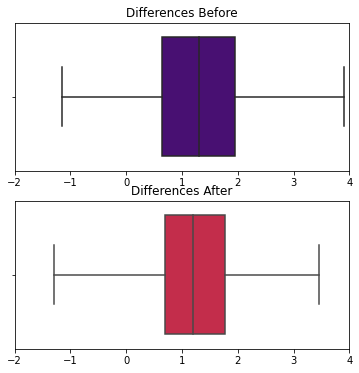

In [26]:
fig = plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
sns.boxplot(x = 'difference', data = before, color = 'indigo')
plt.title('Differences Before')
plt.xlabel('')
plt.xlim((-2,4))

plt.subplot(2,1,2)
sns.boxplot(x = 'difference', data = after, color = 'crimson', whis = 4)
plt.title('Differences After')
plt.xlabel('')
plt.xlim((-2,4))

plt.show()

What does this mean in terms of Fandango supposedly not inflating its grades? Since the average *difference* in ratings between Fandango and Metacritic has not changed, this suggests that Fandango has not deflated its grades substantially. However, the smaller spread of differences may indicate less extreme inflation.

We can also confirm this by comparing the "Before" User Ratings with Metacritic Ratings; if Fandango is accurately reflecting the user ratings in the "After" stars, then we should see similar distributions Before and After.

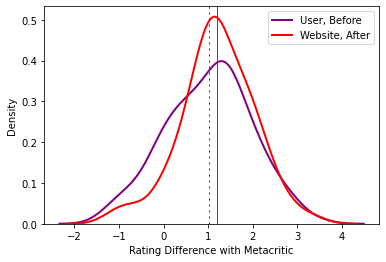

In [27]:
before['diff_rating'] = before['Fandango_Ratingvalue'] - before['Metacritic_rescaled']

sns.kdeplot(x = 'diff_rating', data = before, color = 'purple', lw = 2)
sns.kdeplot(x = 'difference', data = after, color = 'red', lw = 2 )
plt.axvline(before['diff_rating'].mean(), color = 'purple', lw = 1, dashes = [2,4])
plt.axvline(after['difference'].mean(), color = 'red',  lw = 1)
plt.legend(['User, Before', 'Website, After'])
plt.xlabel('Rating Difference with Metacritic')
plt.show()

We see a similar pattern as before - similar means (though this time the website mean is a bit higher than would be expected from the user rankings), and a smaller spread in differences in the "after" sample.

## Conclusions

Our work suggest two main findings:
- scores in the 2016 were slightly lower, on average, than scores in 2015
- this difference in score is at most partially due to Fandango deflating its ratings, as there is a similar trend in Metacritic scores